In [1]:
import numpy as np
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras

2022-11-22 15:21:40.234879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 15:21:40.387707: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-22 15:21:41.095190: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/wsl/lib:
2022-11-22 15:21:41.095273: W tensorflow/compiler/xla/stream_executor

In [2]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

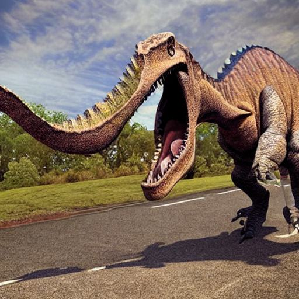

In [3]:
dino_image = load_img("./train/dino/008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg", target_size=(299, 299))
dino_image

In [4]:
dragon_image = load_img("./train/dragon/011689fa-0178-4721-bcb0-6e63c6814a98.jpg", target_size=(299, 299))
dragon_image.size

(299, 299)

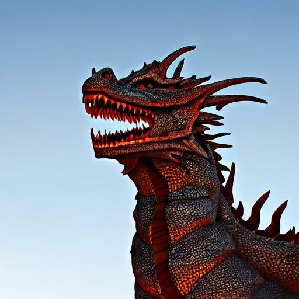

In [5]:
dragon_image

In [6]:
np.array(dragon_image).shape

(299, 299, 3)

### Prepare data

In [7]:
train_gen = ImageDataGenerator(rescale=1./255)

In [8]:
train_ds = train_gen.flow_from_directory("./train", target_size=(150, 150), batch_size=20, shuffle=True, class_mode='binary')

Found 1594 images belonging to 2 classes.


In [9]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [10]:
test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
test_ds = test_gen.flow_from_directory("./test", target_size=(150, 150), batch_size=20, shuffle=True, class_mode='binary')

Found 394 images belonging to 2 classes.


### Create and train model

In [12]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [13]:
input_shape = (150, 150, 3)
inputs = keras.Input(shape=input_shape)
conv_layer = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    input_shape=input_shape,
    activation='relu'
)
pooling_layer = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
dense_layer = Dense(64, activation='relu')
output_layer = Dense(1, activation='sigmoid')


In [14]:
from tensorflow.keras.models import Sequential

#### Question 2

In [15]:
model = Sequential()
model.add(inputs)
model.add(conv_layer)
model.add(pooling_layer)
model.add(flatten_layer)
model.add(dense_layer)
model.add(output_layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

2022-11-22 15:21:42.304610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-22 15:21:42.335976: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-22 15:21:42.336016: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-22 15:21:42.336650: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them i

#### Question 1

In [16]:
learning_rate = 0.002
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [17]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [18]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2022-11-22 15:21:45.314596: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2022-11-22 15:21:46.195923: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 15:21:46.290029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-22 15:21:46.296534: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fd2990242e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-22 15:21:46.296569: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2022-11-22 15:21:46.351370: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 15:21:46.381871: I tensorflow/compiler/jit/xla_

80/80 [==============================] - 7s 42ms/step - loss: 0.6104 - accuracy: 0.6619 - val_loss: 0.5010 - val_accuracy: 0.8401
Epoch 2/10
80/80 [==============================] - 3s 42ms/step - loss: 0.4589 - accuracy: 0.8130 - val_loss: 0.5845 - val_accuracy: 0.6802
Epoch 3/10
80/80 [==============================] - 3s 40ms/step - loss: 0.3949 - accuracy: 0.8350 - val_loss: 0.3572 - val_accuracy: 0.8655
Epoch 4/10
80/80 [==============================] - 3s 40ms/step - loss: 0.3592 - accuracy: 0.8463 - val_loss: 0.3352 - val_accuracy: 0.8629
Epoch 5/10
80/80 [==============================] - 3s 37ms/step - loss: 0.3120 - accuracy: 0.8770 - val_loss: 0.3158 - val_accuracy: 0.8756
Epoch 6/10
80/80 [==============================] - 3s 38ms/step - loss: 0.2712 - accuracy: 0.8990 - val_loss: 0.3574 - val_accuracy: 0.8299
Epoch 7/10
80/80 [==============================] - 3s 38ms/step - loss: 0.2441 - accuracy: 0.9166 - val_loss: 0.3021 - val_accuracy: 0.8731
Epoch 8/10
80/80 [======

#### Question 3

In [19]:
np.median(history.history['accuracy'])

0.8880175650119781

#### Question 4

In [20]:
np.std(history.history['loss'])

0.1300542958904745

### Data augmentation

In [21]:
train_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_ds_aug = train_gen_aug.flow_from_directory("./train", target_size=(150, 150), batch_size=20, shuffle=True, class_mode='binary')

Found 1594 images belonging to 2 classes.


In [22]:
history_aug = model.fit(train_ds_aug, epochs=10, validation_data=test_ds)

Epoch 1/10
80/80 [==============================] - 8s 94ms/step - loss: 0.4097 - accuracy: 0.8137 - val_loss: 0.2810 - val_accuracy: 0.8680
Epoch 2/10
80/80 [==============================] - 7s 91ms/step - loss: 0.4157 - accuracy: 0.8030 - val_loss: 0.4153 - val_accuracy: 0.8198
Epoch 3/10
80/80 [==============================] - 7s 90ms/step - loss: 0.3891 - accuracy: 0.8199 - val_loss: 0.3729 - val_accuracy: 0.8401
Epoch 4/10
80/80 [==============================] - 7s 90ms/step - loss: 0.3786 - accuracy: 0.8407 - val_loss: 0.4280 - val_accuracy: 0.8071
Epoch 5/10
80/80 [==============================] - 7s 93ms/step - loss: 0.3552 - accuracy: 0.8482 - val_loss: 0.4199 - val_accuracy: 0.8299
Epoch 6/10
80/80 [==============================] - 7s 92ms/step - loss: 0.3706 - accuracy: 0.8363 - val_loss: 0.2805 - val_accuracy: 0.8782
Epoch 7/10
80/80 [==============================] - 8s 96ms/step - loss: 0.3366 - accuracy: 0.8570 - val_loss: 0.2739 - val_accuracy: 0.8807
Epoch 8/10
80

#### Question 5

In [27]:
np.mean(history_aug.history['val_loss'])

0.3579533964395523

#### Question 6

In [28]:
np.average(history_aug.history['val_accuracy'][-5:])

0.8517766475677491